## Lane Detection using OpenCV  
*OpenCV-Python is a library of Python bindings designed to solve computer vision problems.*

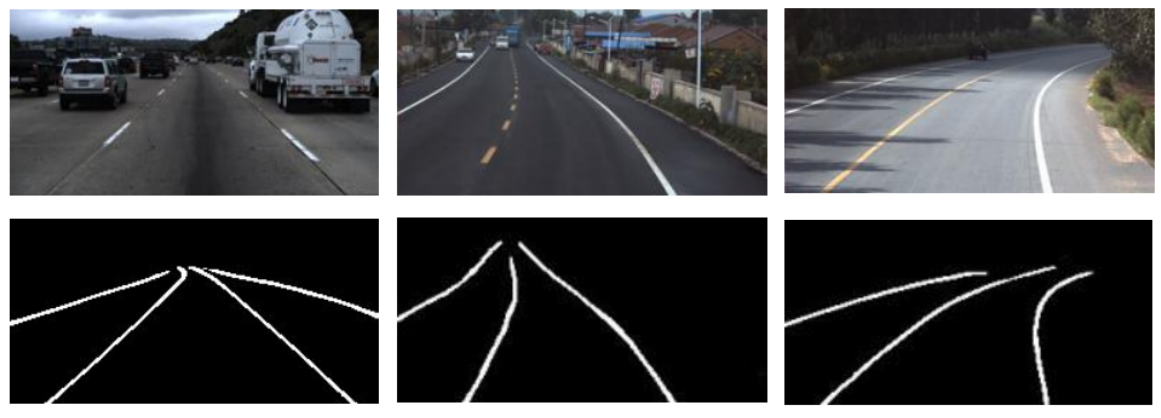

**Capturing and decoding video file**: We will capture the video using VideoCapture object and after the capturing has been initialized every video frame is decoded (i.e. converting into a sequence of images).  
**Grayscale conversion of image**: The video frames are in RGB format, RGB is converted to grayscale because processing a single channel image is faster than processing a three-channel colored image.  
**Reduce noise**: Noise can create false edges, therefore before going further, it’s imperative to perform image smoothening. Gaussian filter is used to perform this process.  
**Canny Edge Detector**: It computes gradient in all directions of our blurred image and traces the edges with large changes in intesity. Outlines strongest gardients in image. Based on the smoothed image, derivatives in both the x (width) and y (height) direction are computed; these in turn are used to compute the gradient magnitude of the image.  
**Region of Interest**: This step is to take into account only the region covered by the road lane. A mask is created here, which is of the same dimension as our road image. Furthermore, bitwise AND operation is performed between each pixel of our canny image and this mask. It ultimately masks the canny image and shows the region of interest traced by the polygonal contour of the mask.  
**Hough Line Transform**: The Hough Line Transform is a transform used to detect straight lines. The Probabilistic Hough Line Transform is used here, which gives output as the extremes of the detected lines

### Import Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### FUNCTIONS

In [2]:
def gradients(image, low_threshold, high_threshold):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, low_threshold, high_threshold)
    return canny

In [3]:
def region_of_interest(image, vertices):
    
    mask = np.zeros_like(image)    
    cv2.fillPoly(mask, vertices, 255)    
    masked_image = cv2.bitwise_and(image, mask) 
    
    return mask, masked_image   

In [4]:
def make_coordinates(image, line_parameters):
    
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3/5))
    
    x1 = int((y1 - intercept)/slope)        
    x2 = int((y2 - intercept)/slope)
    
    return np.array([x1, y1, x2, y2])

In [5]:
def average_slope_intercept(image, lines):
    
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        slope, intercept = np.polyfit((x1, x2), (y1, y2), 1)

        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))

    if len(left_fit) and len(right_fit):
        left_fit_avg = np.average(left_fit, axis = 0)
        right_fit_avg = np.average(right_fit, axis = 0)
    
        left_line = make_coordinates(image, left_fit_avg)
        right_line = make_coordinates(image, right_fit_avg)    
        averaged_lines = [left_line, right_line]      
        return np.array(averaged_lines)

In [6]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)            
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10).astype(float)
    return line_image

## EDA

In [7]:
vid = cv2.VideoCapture('test2.mp4')

In [8]:
# check if capture was successful
if not vid.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    frame_count1 = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width1 = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height1 = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps1 = int(vid.get(cv2.CAP_PROP_FPS))
    pixels1 = frame_height1 * frame_width1
    
    print('Total frames:', frame_count1)
    print('NO. of Pixels in Each Frame:',  pixels1)
    print('width:', frame_width1)
    print('height:', frame_height1)
    print('fps:', fps1)

Video read successful!
Total frames: 1295
NO. of Pixels in Each Frame: 921600
width: 1280
height: 720
fps: 50


In [9]:
# frame
currentframe = [0, 400, 900, 1200]
  
for i in currentframe:
    
    vid.set(1, i)
      
    # reading from frame
    ret,frame = vid.read()  
   
    # if video is still left continue creating images
    name = 'frame' + str(i) + '.jpg'

    # writing the extracted images
    cv2.imwrite(name, frame)
  
# Release all space and windows once done
vid.release()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Frame 1000')

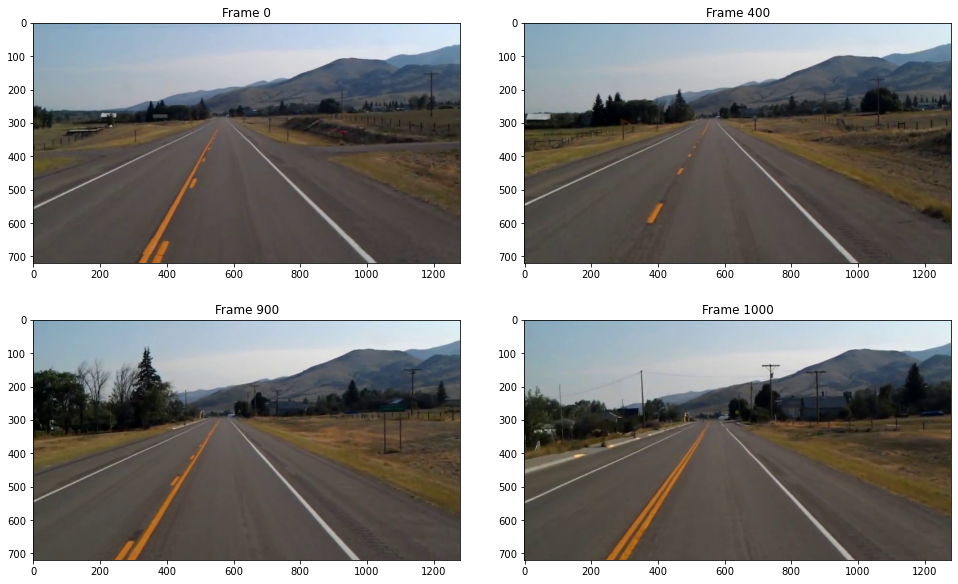

In [10]:
# reading images
Image1 = cv2.imread('frame0.jpg')
Image2 = cv2.imread('frame400.jpg')
Image3 = cv2.imread('frame900.jpg')
Image4 = cv2.imread('frame1200.jpg')

# create figure
fig = plt.figure(figsize = (15, 15))
gs = gridspec.GridSpec(nrows=2, ncols=2, figure = fig, left=0.1, bottom=0.25, right=0.95, top=0.80,
        wspace=0.15, hspace=0., width_ratios=[1, 1])

Image1 = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)
ax1 = plt.subplot(gs[0])
ax1.imshow(Image1)
ax1.set_title('Frame 0')

Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)
ax2 = plt.subplot(gs[1])
ax2.imshow(Image2)
ax2.set_title('Frame 400')

Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)
ax3 = plt.subplot(gs[2])
ax3.imshow(Image3)
ax3.set_title('Frame 900')

Image4 = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
ax4 = plt.subplot(gs[3])
ax4.imshow(Image4)
ax4.set_title('Frame 1000')

# VIDEO 1

In [11]:
vid1 = cv2.VideoCapture('test2.mp4')

In [12]:
# check if capture was successful
if not vid1.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    frame_count1 = int(vid1.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width1 = int(vid1.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height1 = int(vid1.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps1 = int(vid1.get(cv2.CAP_PROP_FPS))
    pixels1 = frame_height1 * frame_width1
    
    print('Total frames:', frame_count1)
    print('NO. of Pixels in Each Frame:',  pixels1)
    print('width:', frame_width1)
    print('height:', frame_height1)
    print('fps:', fps1)

Video read successful!
Total frames: 1295
NO. of Pixels in Each Frame: 921600
width: 1280
height: 720
fps: 50


### STEP 1 - CAPTURE AND DECODE IMAGE

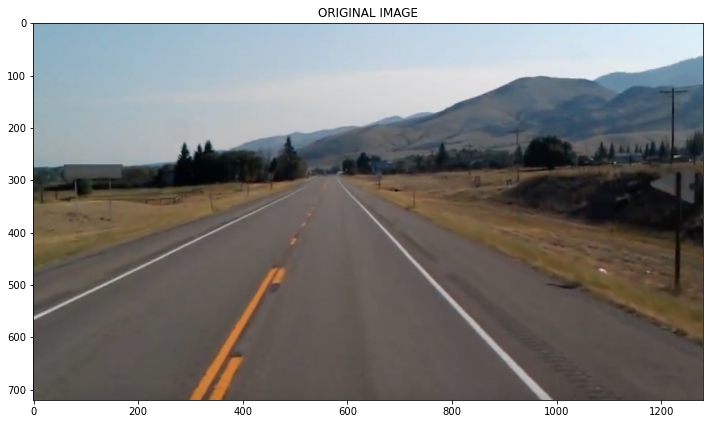

In [13]:
test1 = cv2.imread('test_image.jpg')
test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2RGB)
test1 = cv2.resize(test1, (1280, 720), interpolation=cv2.INTER_AREA)

plt.figure(figsize = (12, 12))
plt.imshow(test1)
plt.title('ORIGINAL IMAGE')
plt.show()

### STEP 2 - GRAYSCALE CONVERSION

In [14]:
lane_image1 = np.copy(test1)

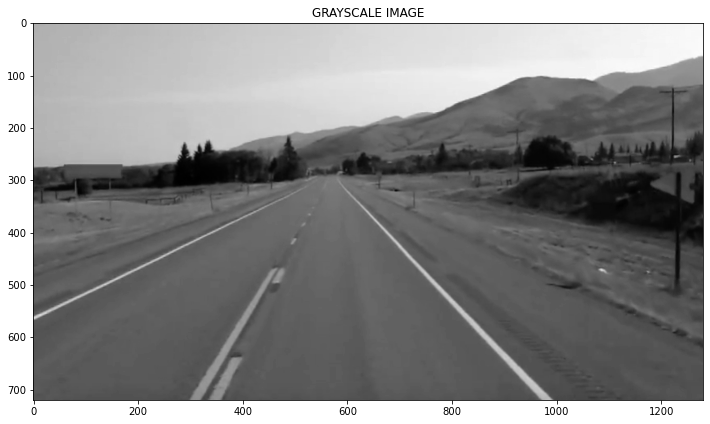

In [15]:
gray1 = cv2.cvtColor(lane_image1, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (12, 12))
plt.imshow(gray1, cmap = 'gray')
plt.title('GRAYSCALE IMAGE')
plt.show()

### STEP 3 - NOISE REDUCTION - GAUSSIANBLUR

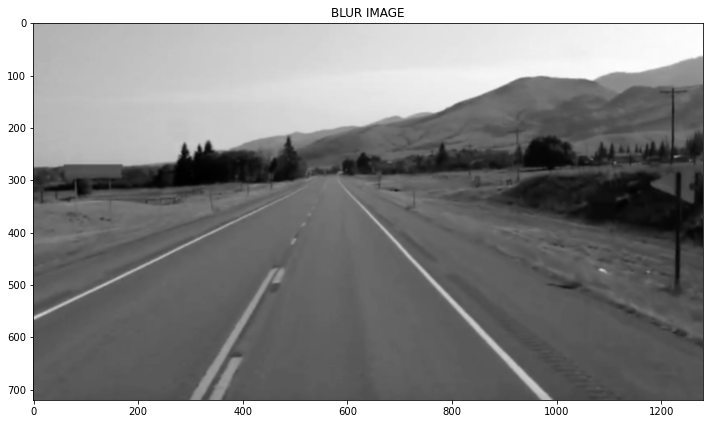

In [16]:
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)  # 5x5 Kernel

plt.figure(figsize = (12, 12))
plt.imshow(blur1, cmap = 'gray')
plt.title('BLUR IMAGE')
plt.show()

### STEP 4 - EDGE DETECTION - CANNY EDGE DETECTOR

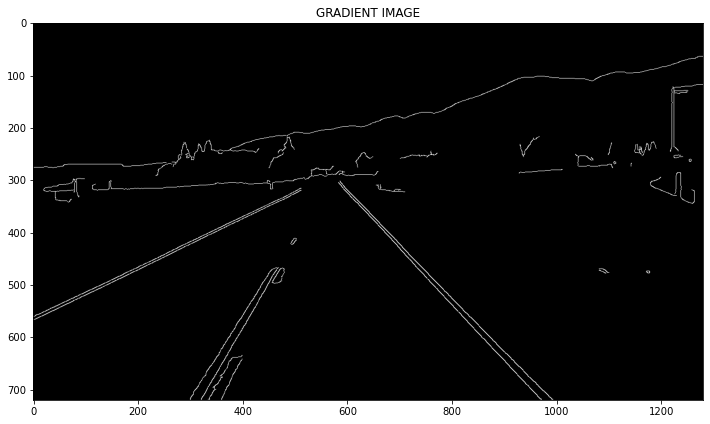

In [17]:
canny1 = cv2.Canny(blur1, 50, 150)

plt.figure(figsize = (12, 12))
plt.imshow(canny1, cmap = 'gray')
plt.title('GRADIENT IMAGE')
plt.show()

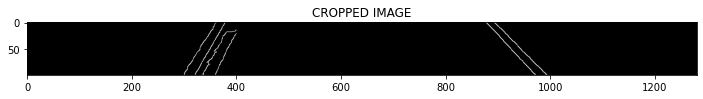

In [18]:
crop_img1 = canny1[620:720, 0:1280]

plt.figure(figsize = (12, 12))
plt.imshow(crop_img1, cmap = 'gray')
plt.title('CROPPED IMAGE')
plt.show()

In [19]:
x1 = np.argwhere(crop_img1 == [255])[0][1]
x2 = np.argwhere(crop_img1 == [255])[-1][1]
x3 = ((np.argwhere(crop_img1 == [255])[-1][1] - np.argwhere(crop_img1 == [255])[0][1])/2)

### STEP 5 - MASKING REGION OF INTEREST

In [20]:
h, w = canny1.shape

vertices1 = np.array([[
    (200, h),
    (1100, h),
    (550, 250)
]])                                           # (600, 360),    (700, 360),

In [21]:
mask1, masked_image1 = region_of_interest(canny1, vertices1)

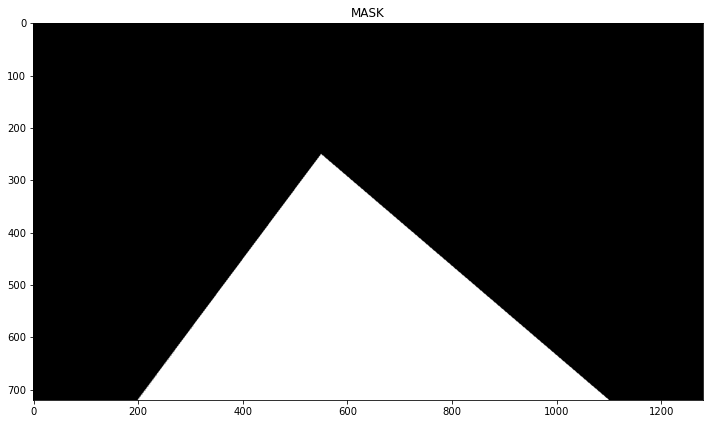

In [22]:
plt.figure(figsize = (12, 12))
plt.imshow(mask1, cmap = 'gray')
plt.title('MASK')
plt.show()

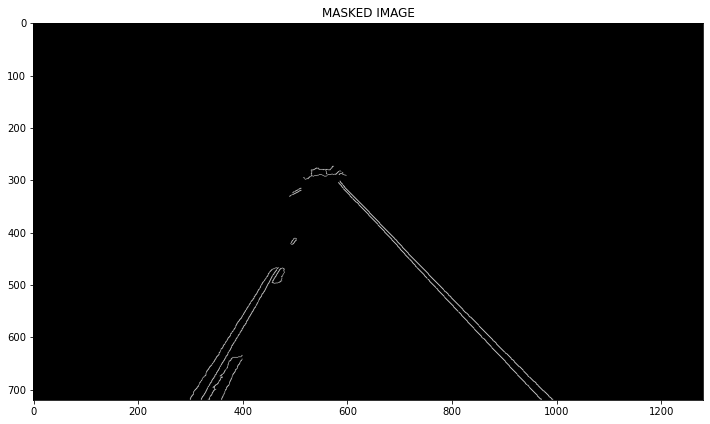

In [23]:
plt.figure(figsize = (12, 12))
plt.imshow(masked_image1, cmap = 'gray')
plt.title('MASKED IMAGE')
plt.show()

### STEP 6 - HOUGH LINE TRANSFORMATION

In [24]:
lines1 = cv2.HoughLinesP(masked_image1, rho = 2, theta = np.pi/180,
                         threshold = 100,
                         minLineLength = 40, maxLineGap = 200)

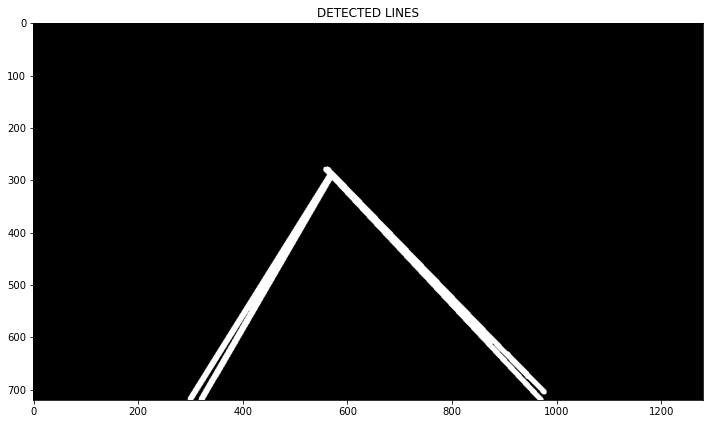

In [25]:
line_image1 = display_lines(masked_image1, lines1)

plt.figure(figsize = (12, 12))
plt.imshow(line_image1, cmap = 'gray')
plt.title('DETECTED LINES')
plt.show()

### OPTIMIZING LINES

In [26]:
averaged_lines1 = average_slope_intercept(lane_image1, lines1)
smooth_line_image1 = display_lines(lane_image1, averaged_lines1)

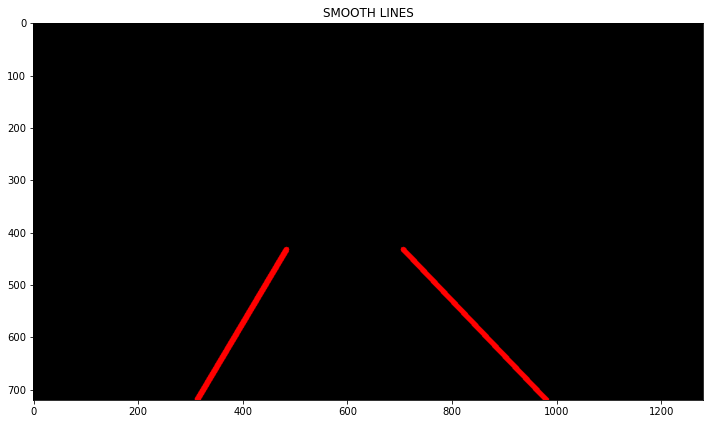

In [27]:
plt.figure(figsize = (12, 12))
plt.imshow(smooth_line_image1, cmap = 'gray')
plt.title('SMOOTH LINES')
plt.show()

### STEP 7 - BLEND IMAGE

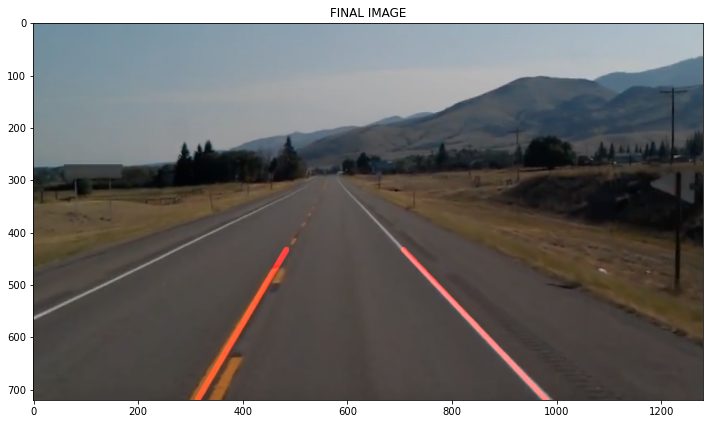

In [28]:
blend_img1 = cv2.addWeighted(lane_image1, 0.8, smooth_line_image1, 1, 1)

plt.figure(figsize = (12, 12))
plt.imshow(blend_img1, cmap = 'gray')
plt.title('FINAL IMAGE')
plt.show()

### ON VIDEO

In [29]:
vid1_OP = 'LANE_DETCETION_01.avi'
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

out1 = cv2.VideoWriter(vid1_OP, fourcc, fps1, (1280, 720))

while(vid1.isOpened()):
    ret, frame = vid1.read()
    if ret == True:
        frame = cv2.resize(frame, (1280, 720), interpolation = cv2.INTER_AREA)
        gradient_img = gradients(frame, 50, 150)
        mask, masked_img = region_of_interest(gradient_img, vertices1)
        lines = cv2.HoughLinesP(masked_img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 350)
        avg_lines = average_slope_intercept(frame, lines)
        line_img = display_lines(frame, avg_lines)
        blend_img = cv2.addWeighted(frame, 0.8, line_img, 1, 1)
        out1.write(blend_img)
        cv2.imshow("window", blend_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
vid1.release()
out1.release
cv2.destroyAllWindows()

# VIDEO2

In [30]:
vid2 = cv2.VideoCapture('solidWhiteRight.mp4')

In [31]:
# check if capture was successful
if not vid2.isOpened(): 
    print("Could not open!")
else:
    print("Video read successful!")
    frame_count2 = int(vid2.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width2 = int(vid2.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height2 = int(vid2.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps2 = int(vid2.get(cv2.CAP_PROP_FPS))
    pixels2 = frame_height2 * frame_width2
    
    print('Total frames:', frame_count2)
    print('NO. of Pixels in Each Frame:',  pixels2)
    print('width:', frame_width2)
    print('height:', frame_height2)
    print('fps:', fps2)

Video read successful!
Total frames: 221
NO. of Pixels in Each Frame: 518400
width: 960
height: 540
fps: 25


### STEP 1 - CAPTURE AND DECODE IMAGE

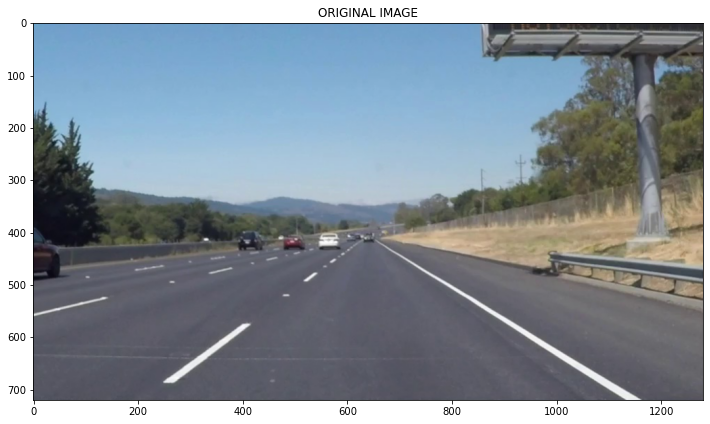

In [32]:
test2 = cv2.imread('test2_image.jpg')
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2RGB)
test2 = cv2.resize(test2, (1280, 720), interpolation=cv2.INTER_AREA)

plt.figure(figsize = (12, 12))
plt.imshow(test2)
plt.title('ORIGINAL IMAGE')
plt.show()

In [33]:
test2.shape

(720, 1280, 3)

In [34]:
lane_image2 = np.copy(test2)

### STEP 2 - GRAYSCALE CONVERSION

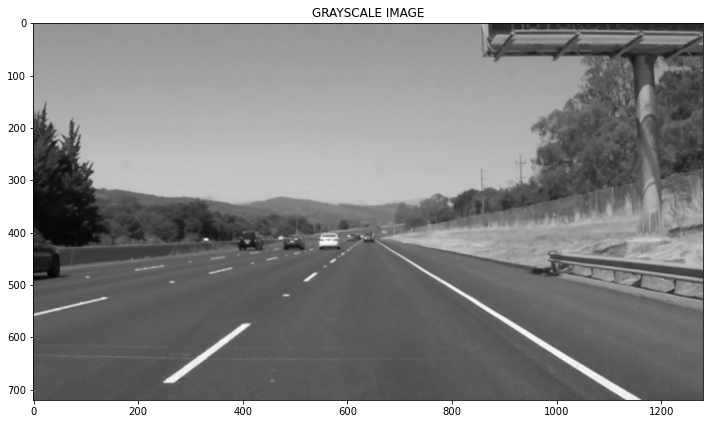

In [35]:
gray2 = cv2.cvtColor(lane_image2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (12, 12))
plt.imshow(gray2, cmap = 'gray')
plt.title('GRAYSCALE IMAGE')
plt.show()

### STEP 3 - NOISE REDUCTION - GAUSSIANBLUR

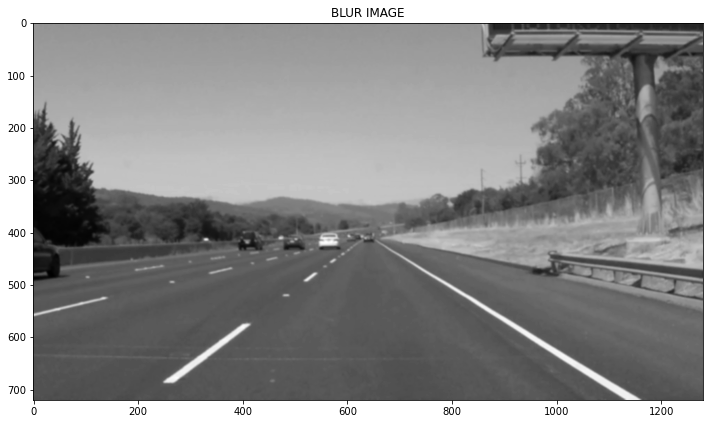

In [36]:
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0) # 5x5 Kernel

plt.figure(figsize = (12, 12))
plt.imshow(blur2, cmap = 'gray')
plt.title('BLUR IMAGE')
plt.show()

### STEP 4 - EDGE DTETECTION - CANNY EDGE DETECTOR

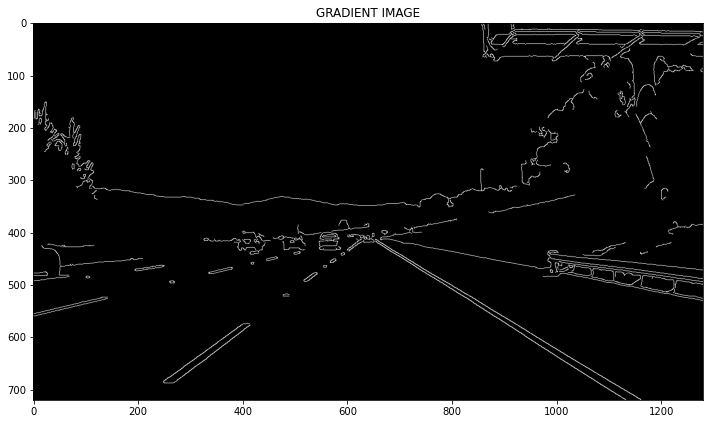

In [37]:
canny2 = cv2.Canny(blur2, 50, 150)

plt.figure(figsize = (12, 12))
plt.imshow(canny2, cmap = 'gray')
plt.title('GRADIENT IMAGE')
plt.show()

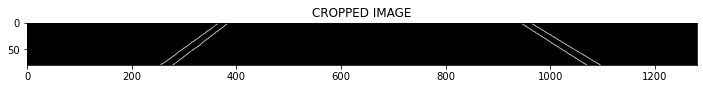

In [38]:
crop_img2 = canny2[600:680, 0:1280]

plt.figure(figsize = (12, 12))
plt.imshow(crop_img2, cmap = 'gray')
plt.title('CROPPED IMAGE')
plt.show()

In [39]:
x1 = np.argwhere(crop_img2 == [255])[0][1]
x2 = np.argwhere(crop_img2 == [255])[-1][1]
x3 = ((np.argwhere(crop_img2 == [255])[-1][1] - np.argwhere(crop_img1 == [255])[0][1])/2)

In [40]:
h, w = canny2.shape

vertices2 = np.array([[
    (150, h),
    (1200, h),
    (650, 400)
]])

### STEP 5 - MASKING REGION OF INTEREST

In [41]:
mask2, masked_image2 = region_of_interest(canny2, vertices2)

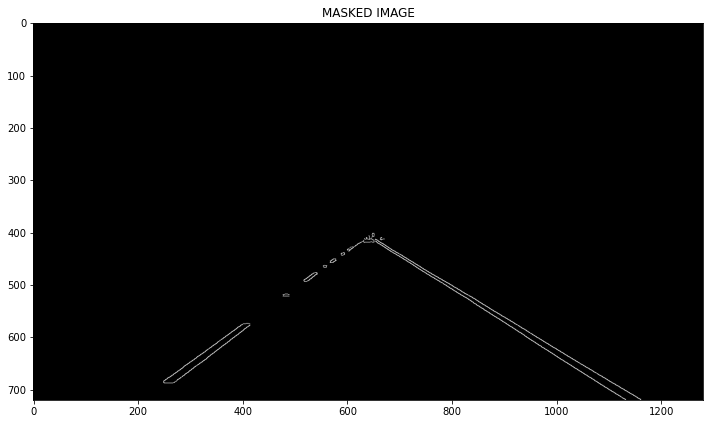

In [42]:
plt.figure(figsize = (12, 12))
plt.imshow(masked_image2, cmap = 'gray')
plt.title('MASKED IMAGE')
plt.show()

### STEP 6 - HOUGH LINE TRANSFORMATION

In [43]:
lines2 = cv2.HoughLinesP(masked_image2, rho = 2, theta = np.pi/180, threshold = 100, minLineLength = 40, maxLineGap = 100)

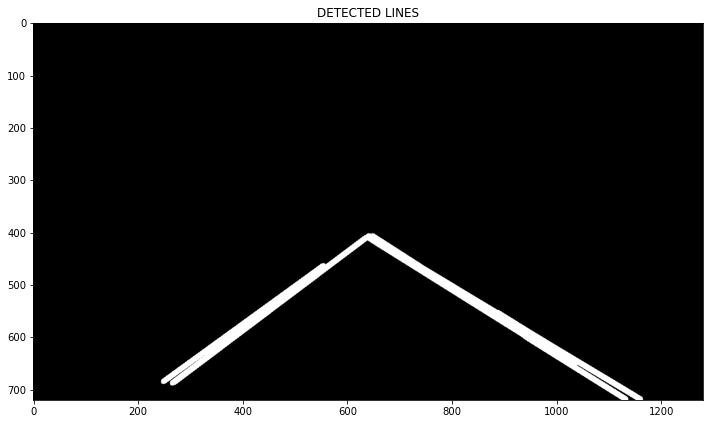

In [44]:
line_image2 = display_lines(masked_image2, lines2)

plt.figure(figsize = (12, 12))
plt.imshow(line_image2, cmap = 'gray')
plt.title('DETECTED LINES')
plt.show()

### OPTIMIZING HOUGH LINEs

In [45]:
averaged_lines2 = average_slope_intercept(lane_image2, lines2)
smooth_line_image2 = display_lines(lane_image2, averaged_lines2)

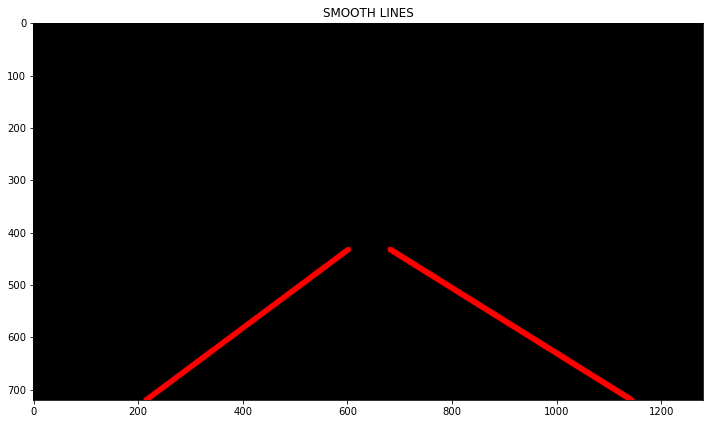

In [46]:
plt.figure(figsize = (12, 12))
plt.imshow(smooth_line_image2, cmap = 'gray')
plt.title('SMOOTH LINES')
plt.show()

### STEP 7 - BLEND IMAGE

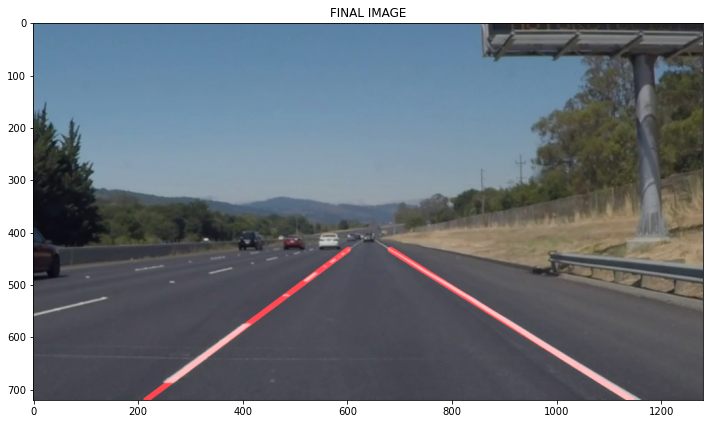

In [47]:
blend_image2 = cv2.addWeighted(lane_image2, 0.8, smooth_line_image2, 1, 1)

plt.figure(figsize = (12, 12))
plt.imshow(blend_image2, cmap = 'gray')
plt.title('FINAL IMAGE')
plt.show()

### ON VIDEO

In [48]:
vid2_OP = 'LANE_DETECTION_02.avi'
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

out2 = cv2.VideoWriter(vid2_OP, fourcc, fps2, (1280, 720))

while(vid2.isOpened()):
    ret, frame = vid2.read()
    if ret == True:
        frame = cv2.resize(frame, (1280, 720), interpolation = cv2.INTER_AREA)
        gradient_img = gradients(frame, 50, 150)
        mask, masked_img = region_of_interest(gradient_img, vertices2)
        lines = cv2.HoughLinesP(masked_img, 2, np.pi/180, 100, np.array([]), minLineLength = 10, maxLineGap = 250)
        avg_lines = average_slope_intercept(frame, lines)
        line_img = display_lines(frame, avg_lines)
        blend_img = cv2.addWeighted(frame, 0.8, line_img, 1, 1)
        out2.write(blend_img)
        cv2.imshow("window", blend_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
vid2.release()
out2.release
cv2.destroyAllWindows()

# VIDEO 3

In [49]:
vid3 = cv2.VideoCapture('Downtown.mp4')

In [50]:
if not vid3.isOpened():
    print('Could not Open')
else:
    frame_count3 = int(vid3.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width3 = int(vid3.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height3 = int(vid3.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps3 = int(vid3.get(cv2.CAP_PROP_FPS))
    pixels3 = frame_height3 * frame_width3
    
    print('Total frames:', frame_count3)
    print('NO. of Pixels in Each Frame:',  pixels3)
    print('width:', frame_width3)
    print('height:', frame_height3)
    print('fps:', fps3)

Total frames: 1342
NO. of Pixels in Each Frame: 230400
width: 640
height: 360
fps: 29


### STEP 1 - CAPTURE AND DECODE IMAGE

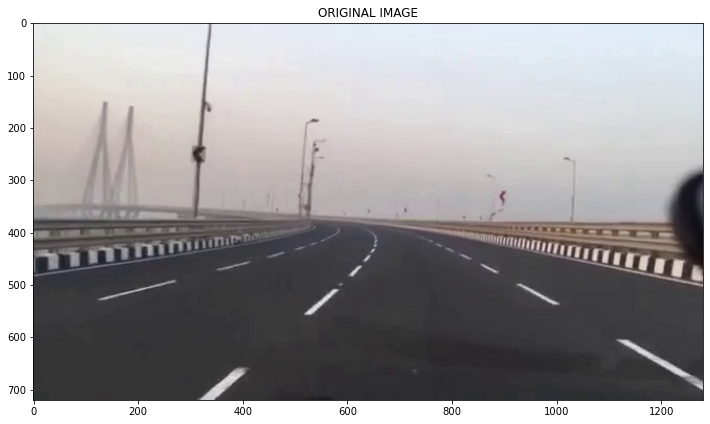

In [51]:
test3 = cv2.imread('test3_image.jpg')
test3 = cv2.cvtColor(test3, cv2.COLOR_BGR2RGB)
test3 = cv2.resize(test3, (1280, 720), interpolation = cv2.INTER_AREA)

plt.figure(figsize = (12, 12))
plt.imshow(test3)
plt.title('ORIGINAL IMAGE')
plt.show()

In [52]:
lane_image3 = np.copy(test3)

### STEP 2 - GRAYSCALE CONVERSION

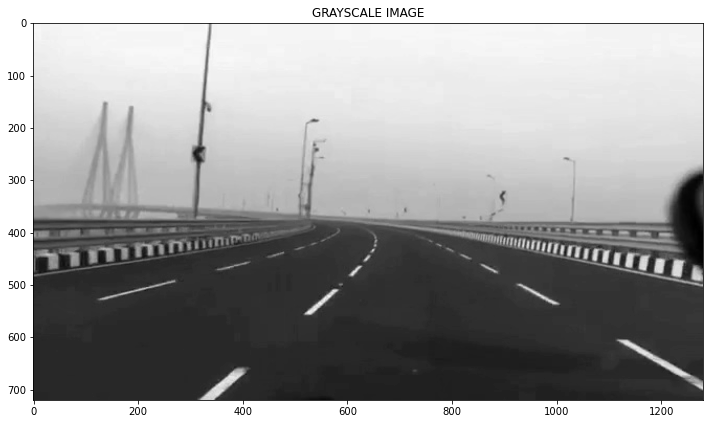

In [53]:
gray3 = cv2.cvtColor(lane_image3, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (12, 12))
plt.imshow(gray3, cmap = 'gray')
plt.title('GRAYSCALE IMAGE')
plt.show()

### STEP 3 - NOISE REDUCTION - GAUSSINA BLUR

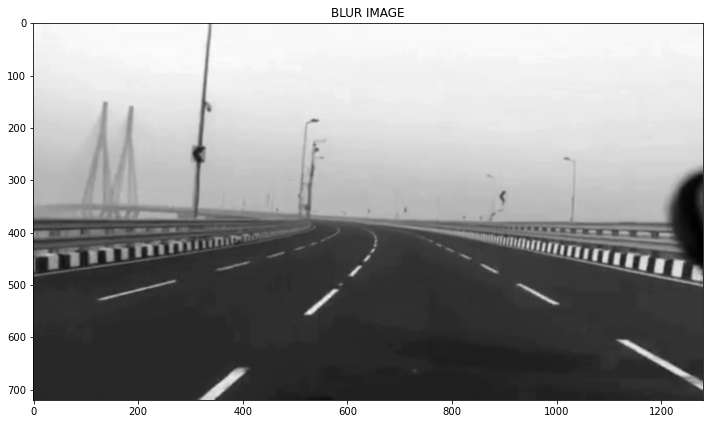

In [54]:
blur3 = cv2.GaussianBlur(gray3, (5, 5), 1)

plt.figure(figsize = (12, 12))
plt.imshow(blur3, cmap = 'gray')
plt.title('BLUR IMAGE')
plt.show()

### STEP 4 - CANNY EDGE DETECTOR - GRADIENT IMAGE

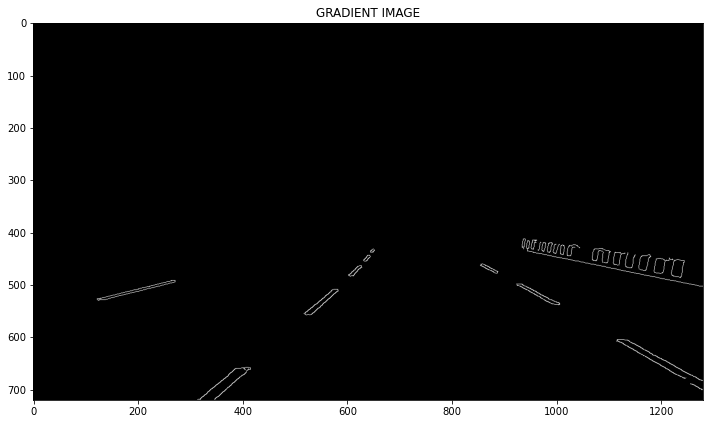

In [55]:
canny3 = cv2.Canny(blur3, 50, 350)

plt.figure(figsize = (12, 12))
plt.imshow(canny3, cmap = 'gray')
plt.title('GRADIENT IMAGE')
plt.show()

### STEP 5 - MASKING REGION OF INTEREST

In [56]:
h = canny3.shape[0]

vertices3 = np.array([[
    (200, h),
    (650, 400),
    (850, 400),
    (1280, h)
]])

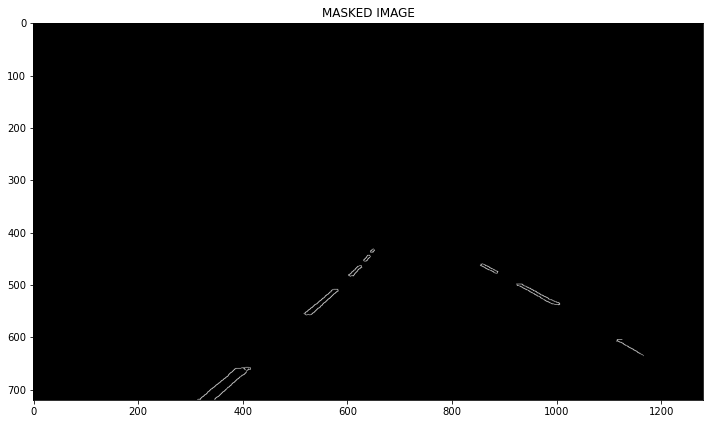

In [57]:
mask3, masked_image3 = region_of_interest(canny3, vertices3)

plt.figure(figsize = (12, 12))
plt.imshow(masked_image3, cmap = 'gray')
plt.title('MASKED IMAGE')
plt.show()

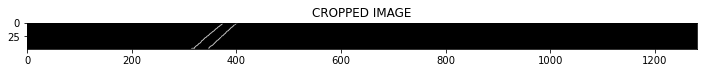

In [58]:
crop_img3 = masked_image3[670:720, 0:1280]

plt.figure(figsize = (12, 12))
plt.imshow(crop_img3, cmap = 'gray')
plt.title('CROPPED IMAGE')
plt.show()

print(x1, x2, x3)

### STEP 6 - HOUGH LINE TRANSFORMATION

Len 7


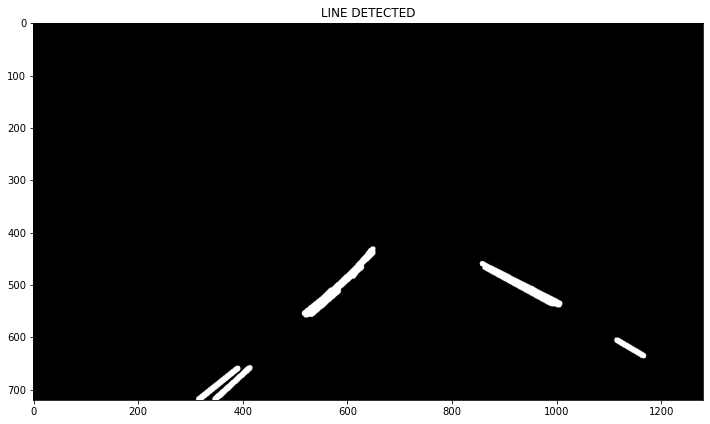

In [59]:
lines3 = cv2.HoughLinesP(masked_image3, rho = 2, theta = np.pi/180, threshold = 40, minLineLength = 40, maxLineGap = 55)

#lines3 = cv2.HoughLinesP(masked_image3, rho = 2, theta = np.pi/180, threshold = 20, minLineLength = 35, maxLineGap = 100)
print('Len', len(lines))
line_image3 = display_lines(masked_image3, lines3)

plt.figure(figsize = (12, 12))
plt.imshow(line_image3, cmap = 'gray')
plt.title('LINE DETECTED')
plt.show()

In [60]:
averaged_lines3 = average_slope_intercept(lane_image3, lines3)
smooth_line_image3 = display_lines(lane_image3, averaged_lines3)

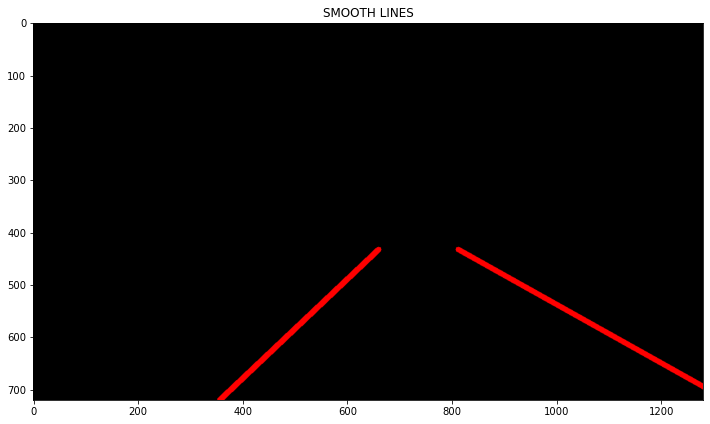

In [61]:
plt.figure(figsize = (12, 12))
plt.imshow(smooth_line_image3, cmap = 'gray')
plt.title('SMOOTH LINES')
plt.show()

### STEP 7 - BLEND IMAGE

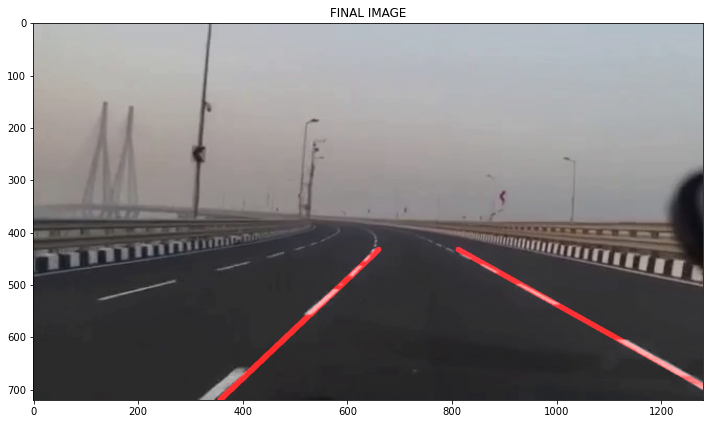

In [62]:
blend_image2 = cv2.addWeighted(lane_image3, 0.8, smooth_line_image3, 1, 1)

plt.figure(figsize = (12, 12))
plt.imshow(blend_image2, cmap = 'gray')
plt.title('FINAL IMAGE')
plt.show()

### ON VIDEO

In [63]:
vid3_OP = 'LANE_DETECTION_03.avi'
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out3 = cv2.VideoWriter(vid3_OP, fourcc, fps3, (1280, 720))

count = 0

while(vid3.isOpened()):
    
    ret, frame = vid3.read()
    
    if ret == True:
        frame = cv2.resize(frame, (1280, 720), interpolation = cv2.INTER_AREA)
        gradient_img = gradients(frame, 50, 350)
        mask, masked_image = region_of_interest(gradient_img, vertices3)

        lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 40, np.array([]), minLineLength = 40, maxLineGap = 55)
        if lines is not None:
            if len(lines) <= 5:
                lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 20, np.array([]), minLineLength = 35, maxLineGap = 100)
                #print('line_len_before', len(lines))
        else:
            lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 20, np.array([]), minLineLength = 35, maxLineGap = 100)
            #print('line_len_None', len(lines))
        
        avg_lines = average_slope_intercept(frame, lines)
        line_img = display_lines(frame, avg_lines)
        blend_img = cv2.addWeighted(frame, 0.8, line_img, 1, 1)
        out3.write(blend_img)
        count += 1
        #print('count', count)
        cv2.imshow('window', blend_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
vid3.release()
out3.release
cv2.destroyAllWindows()   